# **Implémentation des techniques pour Data Mining (GMM)**




---



Réaliser par: **Sofiane TRABELSI**

In [1]:
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

GMM avec 2 clusters et sans classe


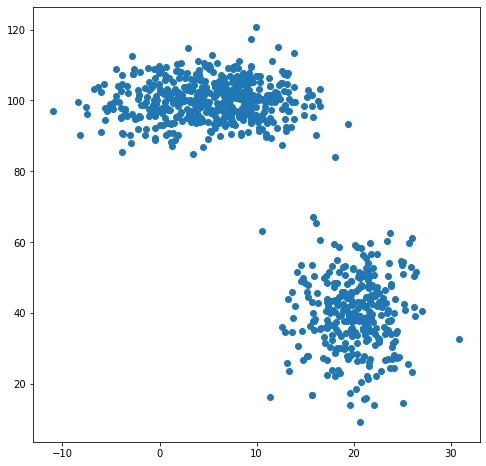

(2,)


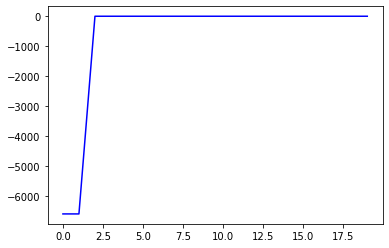

In [2]:
N=800
mu1=np.array([20,40])
cov1=np.array([[10,0],[0,100]])
N1=300
mu2=np.array([5,100])
cov2=np.array([[30,0],[0,30]])
N2=500
x1=np.random.multivariate_normal(mean=mu1,cov=cov1,size=N1)
x2=np.random.multivariate_normal(mean=mu2,cov=cov2,size=N2)
X=np.vstack([x1,x2])

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1])
plt.show()
random_indices = np.random.choice(N, size=2, replace=False)
mui=X[random_indices, :]   
pii = np.ones(2)/2
print(pii.shape)
cov= np.cov(X.T)
covi=[cov]*2
xi=[np.zeros((400,2))]*2
mni=[np.zeros((400,2))]*2
for i in range(2):
  xi[i]=np.random.multivariate_normal(mean=mui[i],cov=covi[i],size=int((N/2)))

  mni[i]=multivariate_normal(mean=mui[i], cov=covi[i])

     
p=[np.zeros(2)]*2
labels=np.zeros(X.shape[0])
for i,j in enumerate(X):
  p=[np.zeros(2)]*2
  for k in range(2):
    p[k]=mni[k].pdf(j)*pii[k]
  labels[i]=np.argmax(p)

xi=[np.zeros((400,2))]*2
for i in range(2):
  xi[i]=X[labels==i]



def gmm_dist (X,mui,covi,pii):
    mn=[np.zeros((int(X.shape[0]/2),2))]*2
    dist=[np.zeros(X.shape[0])]
    for i in range(2):
      mn[i]=multivariate_normal(mean=mui[i],cov=covi[i])
      dist=(pii[i]*mn[i].pdf(X))+ dist
    return dist
gmm_dist=gmm_dist (X,mui,covi,pii)
logL=np.sum(np.log(gmm_dist))
T_max=20
logLL=np.zeros(T_max)
epsilon=0.001
for t in range(T_max):
    logLL[t]=logL
    if abs(np.subtract(logLL[t],logLL[t-1])) < epsilon :
     break
plt.plot(logLL,'b-')

N clusters avec classe GMM


In [3]:
class GMM:
    def __init__(self, num_clusters,num_max_iteration,epsilon):
        self.num_clusters = num_clusters
        self.num_max_iteration = num_max_iteration
        self.epsilon=epsilon

    def initialisation_parametre(self,X):
        random_indices = np.random.choice(N, size=self.num_clusters, replace=False)
        mui=X[random_indices, :]   
        pii = np.ones(self.num_clusters)/self.num_clusters
        cov= np.cov(X.T)
        covi=[cov]*self.num_clusters

        return mui,covi,pii

    def determiner_cluster(self,mui,covi,pii,X):
        xi=[np.zeros((int(N/self.num_clusters),2))]*self.num_clusters
        mni=[np.zeros((int(N/self.num_clusters),2))]*self.num_clusters     
        for i in range(self.num_clusters):
          xi[i]=np.random.multivariate_normal(mean=mui[i],cov=covi[i],size=int((N/self.num_clusters)))
          mni[i]=multivariate_normal(mean=mui[i], cov=covi[i])

        p=[np.zeros(self.num_clusters)]*self.num_clusters
        labels=np.zeros(X.shape[0])
        for i,j in enumerate(X):
          p=[np.zeros(self.num_clusters)]*self.num_clusters
          for k in range(self.num_clusters):
            p[k]=mni[k].pdf(j)*pii[k]
          labels[i]=np.argmax(p)
        return labels

    def estime_parametres_GMM(self,labels):
        xi=[np.zeros((int(N/self.num_clusters),2))]*self.num_clusters
        for i in range(self.num_clusters):
          xi[i]=X[labels==i]
        mui=[np.zeros(2)]*self.num_clusters
        covi=[np.zeros((2,2))]*self.num_clusters
        Ni=np.zeros((self.num_clusters,self.num_clusters))
        pii=np.zeros((self.num_clusters,self.num_clusters))
        for i in range(self.num_clusters):
          mui[i]=np.mean(xi[i],axis=0)
          covi[i]=np.cov(xi[i].T)
          Ni[i]=xi[i].shape[0]
          pii[i]=Ni[i]/N
        return mui,covi,Ni,pii

    def gmm_dist (self,X,mui,covi,pii):
        mn=[np.zeros((int(X.shape[0]/self.num_clusters),2))]*self.num_clusters
        gmm_dist=[np.zeros(X.shape[0])]
        for i in range(self.num_clusters):
          mn[i]=multivariate_normal(mean=mui[i],cov=covi[i])
          gmm_dist=(pii[i][i]*mn[i].pdf(X))+ gmm_dist
        return gmm_dist

    def logL(self,gmm_dist):    
      logL=np.sum(np.log(gmm_dist))
      return logL

    def convergence(self,logL):
      logLL=np.zeros(self.num_max_iteration)
      for t in range(self.num_max_iteration):
        logLL[t]=logL
        if abs(np.subtract(logLL[t],logLL[t-1])) < self.epsilon :
          break
      plt.plot(logLL,'b-')

    def fit(self,X):
      self.initialisation_parametre(X)
      self.determiner_cluster(mui,covi,pii,X)
      self.estime_parametres_GMM(labels)
      
    def predict(self,X):
      mui,covi,pii=self.initialisation_parametre(X)
      labels=self.determiner_cluster(mui,covi,pii,X)
      return labels

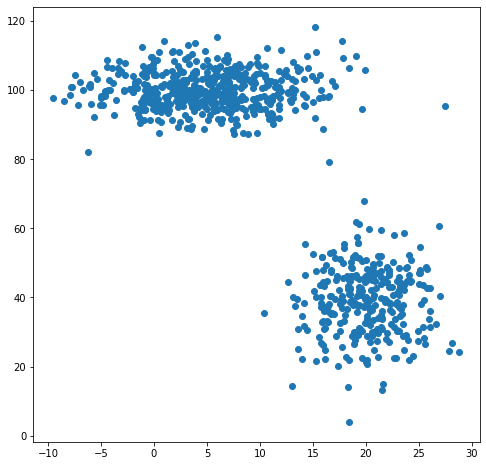

-6336.3717036179


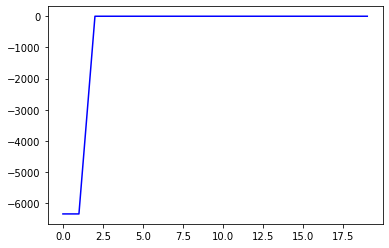

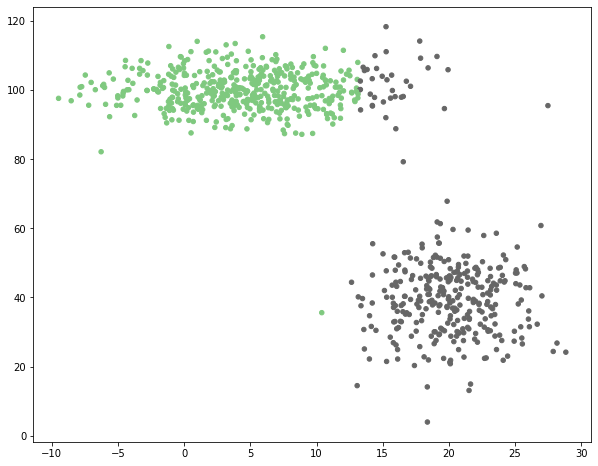

In [4]:
N=800
mu1=np.array([20,40])
cov1=np.array([[10,0],[0,100]])
N1=300
mu2=np.array([5,100])
cov2=np.array([[30,0],[0,30]])
N2=500
x1=np.random.multivariate_normal(mean=mu1,cov=cov1,size=N1)
x2=np.random.multivariate_normal(mean=mu2,cov=cov2,size=N2)
X=np.vstack([x1,x2])
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

gmm=GMM(2,20,0.001)
mui,covi,pii=gmm.initialisation_parametre(X)
labels=gmm.determiner_cluster(mui,covi,pii,X)
mui,covi,Ni,pii=gmm.estime_parametres_GMM(labels)
dist=gmm.gmm_dist (X,mui,covi,pii)
logL=gmm.logL(dist)
print(logL)
gmm.convergence(logL)

gmm.fit(X)
labels=gmm.predict(X)
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='Accent');
plt.show()